## Descrição

Esse notebook foi construído para realizar alguns desafios com base no **Projeto Imobiliária**

## Análise exploratória dos dados

In [1]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')

In [3]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

# removendo imóveis comerciais
df = dados.query('@imoveis_comerciais not in Tipo')

# selecionando apenas imóveis do tipo apartamento
df = df.query('Tipo == "Apartamento"')

# visualizando a base de dados
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


### Desafio 1
Calcular a média de quartos por apartamento

In [4]:
df['Quartos'].mean().round(2)

2.48

### Desafio 2
Conferir quantos bairros únicos existem na nossa base de dados

In [5]:
df['Bairro'].nunique()

149

### Desafio 3
Analisar quais bairros possuem a média de valor de aluguel mais elevadas

In [6]:
# Agrupa os dados por bairro, calcula a média do valor de aluguel e ordena do maior para o menor
media_valor_bairro = df.groupby('Bairro')[['Valor']].mean().round(2).sort_values(by='Valor', ascending=False)

# Exibe os 10 bairros com maior média de aluguel
media_valor_bairro.head(5)

,Valor
Bairro,
Joá,15500.00
Arpoador,12429.77
Cidade Jardim,12000.00
Ipanema,9487.21
Botafogo,9369.21


### Desafio 4
Criar um gráfico de barras verticais que apresente os 5 bairros com a média de valor de aluguel mais elevadas

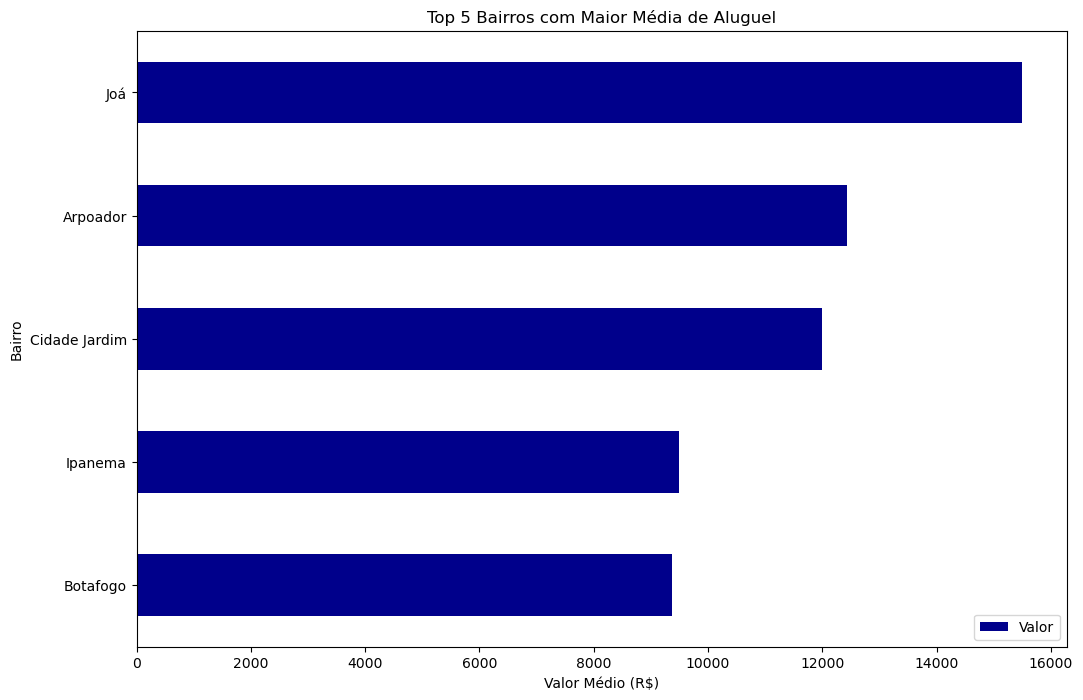

In [7]:
media_valor_bairro.head().plot(kind='barh', figsize=(12, 8), color='darkblue')
plt.title('Top 5 Bairros com Maior Média de Aluguel')
plt.xlabel('Valor Médio (R$)')
plt.ylabel('Bairro')
plt.gca().invert_yaxis()  # Inverte para o maior valor no topo
plt.show()